### Import Libraries

In [1]:
# import packages
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", rc={"figure.figsize":(12, 5)})

from feature_engine.datetime import DatetimeFeatures


In [2]:
# load dataset
url = 'monthly_sales_data.csv'
sales_data = pd.read_csv(url)

In [3]:
# show dataset
sales_data.head()

,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion
0,Sports,2002-01-01,108592,2002,1,Xbox,1,0
1,RPG,2002-02-01,129387,2002,4,Nintendo,0,0
2,Sports,2002-03-01,114777,2002,4,PC,0,0
3,Sports,2002-04-01,71738,2002,0,Nintendo,0,0
4,Simulation,2002-05-01,142512,2002,2,PlayStation,0,0


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       264 non-null    object
 1   Month          264 non-null    object
 2   Monthly Sales  264 non-null    int64 
 3   Year           264 non-null    int64 
 4   DayOfWeek      264 non-null    int64 
 5   Platform       264 non-null    object
 6   Holiday        264 non-null    int64 
 7   Promotion      264 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 16.6+ KB


In [5]:
sales_data.isna().sum()

Category         0
Month            0
Monthly Sales    0
Year             0
DayOfWeek        0
Platform         0
Holiday          0
Promotion        0
dtype: int64

In [6]:
# Convert Month column to datetime object
sales_data['Month'] = pd.to_datetime(sales_data['Month'])

<Axes: xlabel='Month', ylabel='Monthly Sales'>

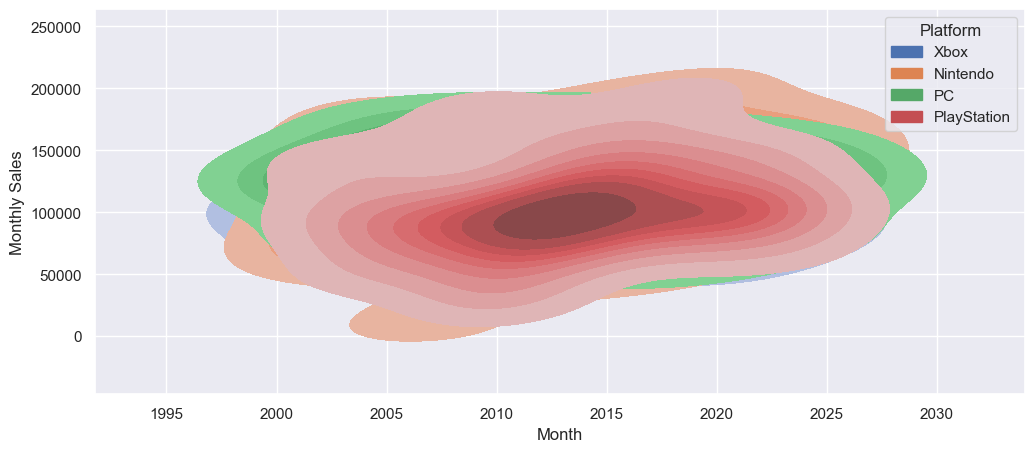

In [7]:
sns.kdeplot(sales_data, x='Month', y='Monthly Sales',  hue='Platform', fill=True)

<Axes: xlabel='Monthly Sales', ylabel='Density'>

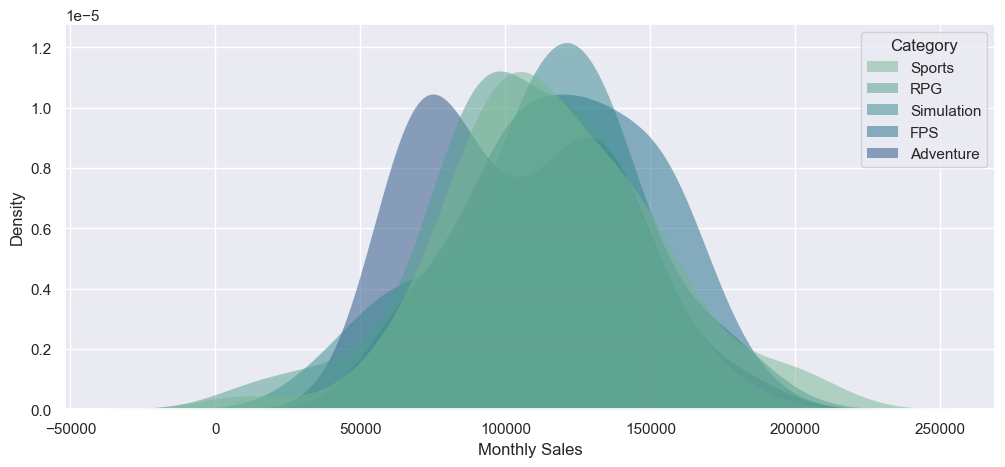

In [8]:
sns.kdeplot(sales_data, x='Monthly Sales', hue='Category',
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)

In [9]:
df_sales = sales_data.set_index('Month')
df_sales.head()

,Category,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion
Month,,,,,,,
2002-01-01,Sports,108592,2002,1,Xbox,1,0
2002-02-01,RPG,129387,2002,4,Nintendo,0,0
2002-03-01,Sports,114777,2002,4,PC,0,0
2002-04-01,Sports,71738,2002,0,Nintendo,0,0
2002-05-01,Simulation,142512,2002,2,PlayStation,0,0


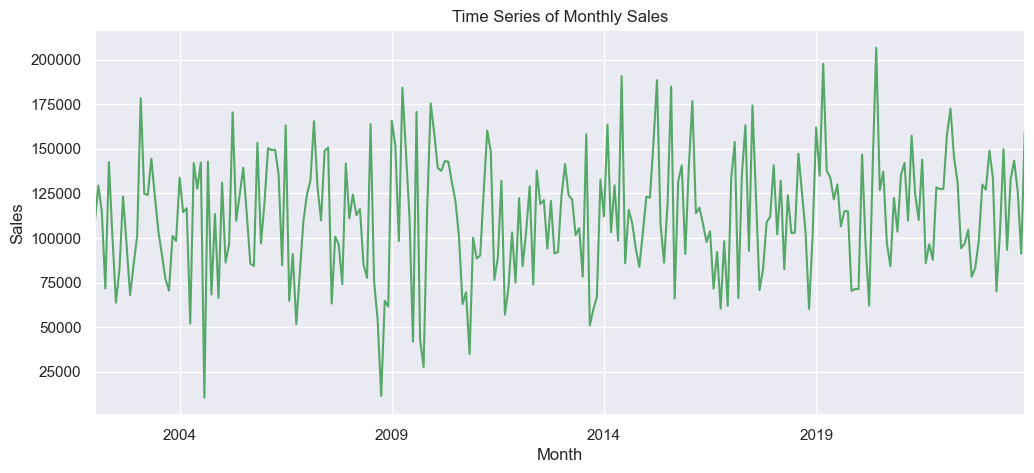

In [10]:
# plot the time series
color_pal = sns.color_palette()
df_sales['Monthly Sales'].plot(style='-', figsize=(12,5), ms=2, title='Time Series of Monthly Sales', 
                               color= color_pal[2], ylabel='Sales');

In [11]:
# get features in dataset
df_sales.columns

Index(['Category', 'Monthly Sales', 'Year', 'DayOfWeek', 'Platform', 'Holiday',
       'Promotion'],
      dtype='object')

In [12]:
# Number of categories
print('Number of Unique Categories: ', df_sales['Category'].nunique())
print('List of Categories: ', df_sales['Category'].unique())

Number of Unique Categories:  5
List of Categories:  ['Sports' 'RPG' 'Simulation' 'FPS' 'Adventure']


In [13]:
# Number of platforms
print('Number of Unique Platforms: ', df_sales['Platform'].nunique())
print('List of Platforms: ', df_sales['Platform'].unique())

Number of Unique Platforms:  4
List of Platforms:  ['Xbox' 'Nintendo' 'PC' 'PlayStation']


### Explore the Categorical Features with Respest to Monthly Sales

##### Plot the Category in respest to the Monthly Sales

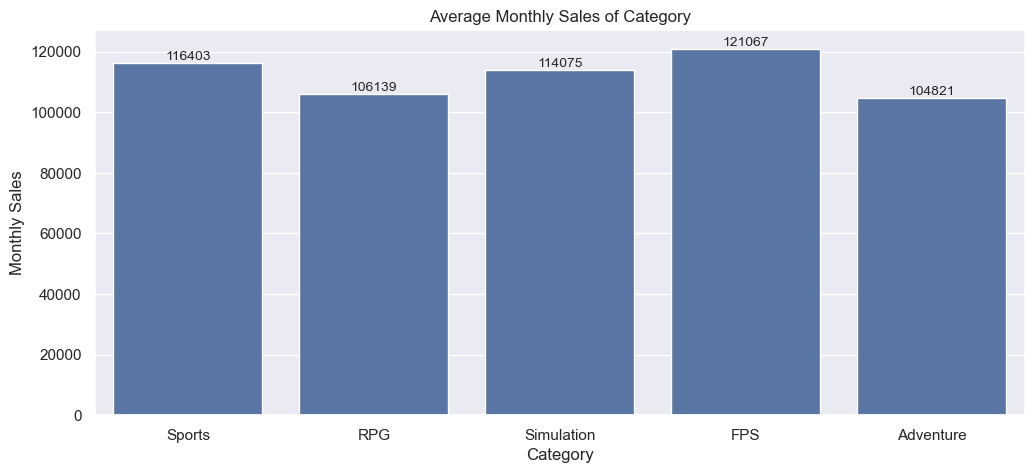

In [14]:
# bar plot of Category
ax = sns.barplot(
    df_sales, x='Category', y='Monthly Sales', estimator='mean', errorbar=None)
ax.set_title('Average Monthly Sales of Category')
ax.bar_label(ax.containers[0], fontsize=10);

##### Plot the Platform in respest to the Monthly Sales

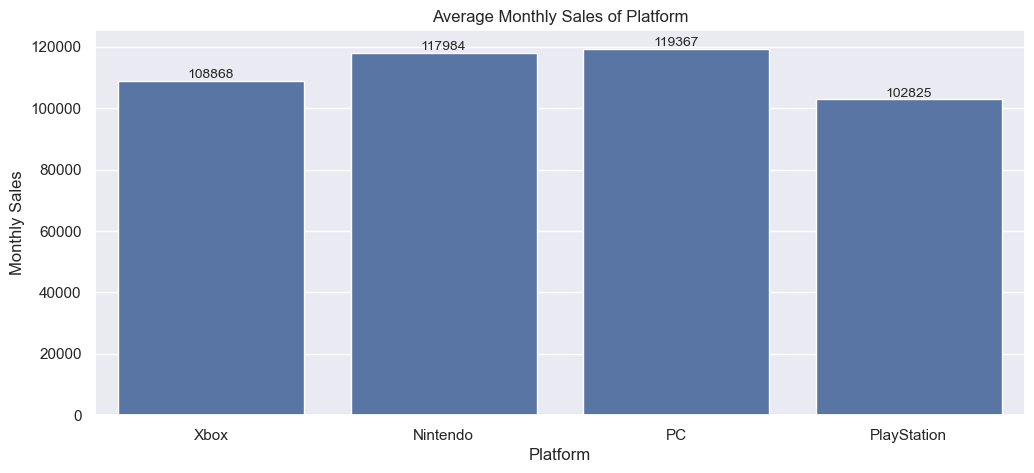

In [15]:
# bar plot of Platforms
ax = sns.barplot(
    df_sales, x='Platform', y='Monthly Sales', errorbar=None)
ax.set_title('Average Monthly Sales of Platform')
ax.bar_label(ax.containers[0], fontsize=10);

#### Frequency of Sales Demand of the Platform Within Each Category.

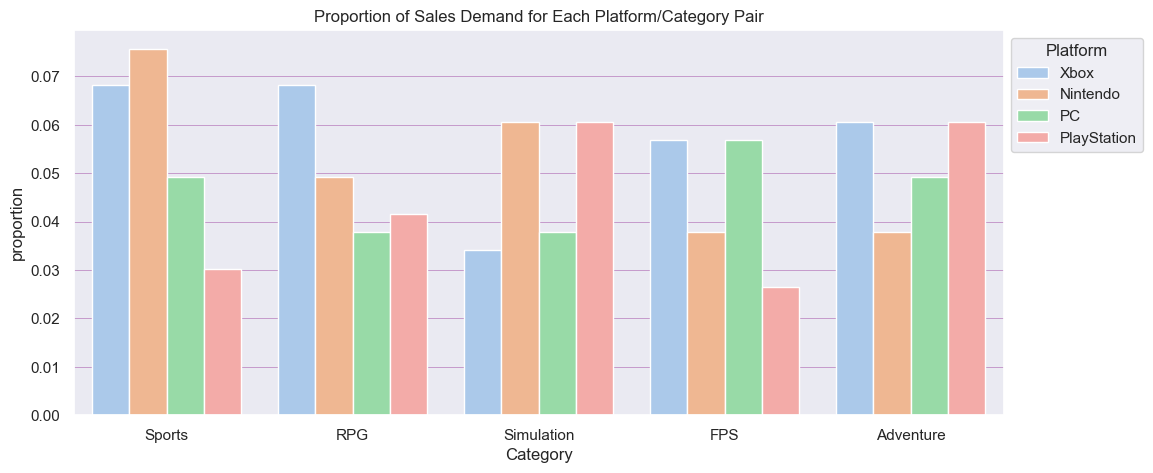

In [16]:
# plot the countplot to know the frequency of demand for category of each platform
ax = sns.countplot(df_sales, x='Category', hue='Platform', palette='pastel', stat='proportion')
ax.yaxis.grid(linewidth=.4, alpha=.6, color='purple')
ax.set_title('Proportion of Sales Demand for Each Platform/Category Pair')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#### Spread of the Monthly Sales for Across Category/Platform.

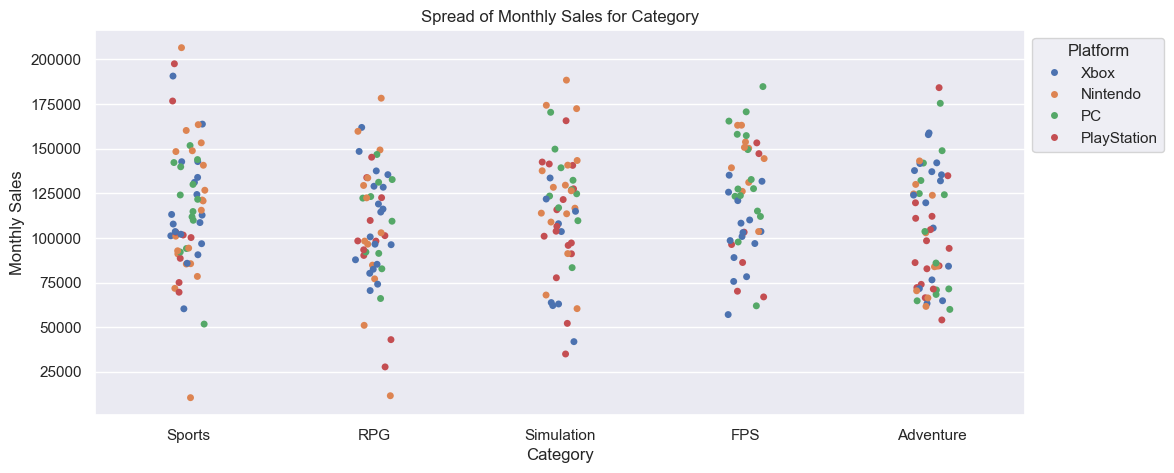

In [17]:
# visualise the range of monthly sales for Category
ax = sns.stripplot(df_sales, x='Category', y='Monthly Sales', hue='Platform')
ax.set_title('Spread of Monthly Sales for Category')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

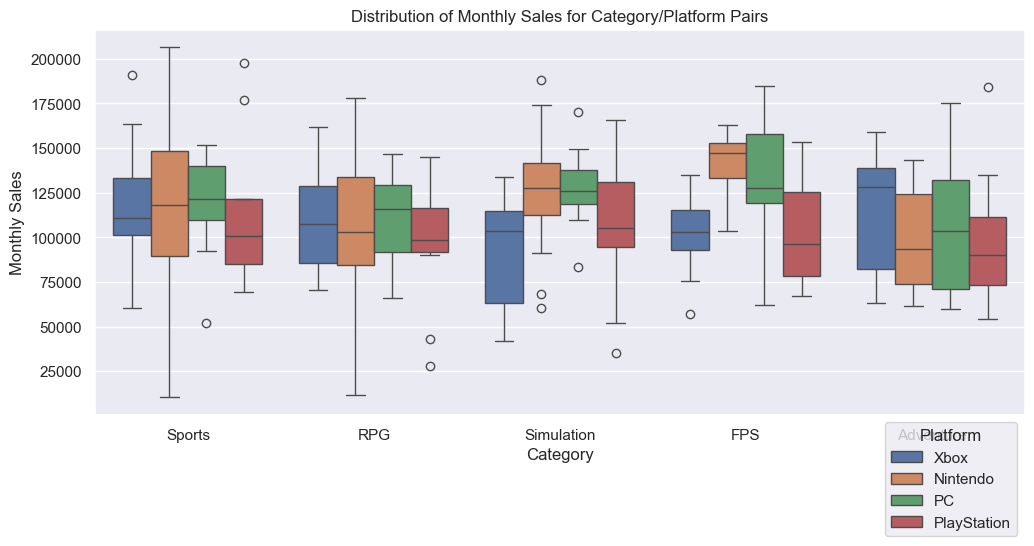

In [18]:
# visualise the distributions of Monthly sales across Platform/Category pairs
ax = sns.boxplot(df_sales, x='Category', y='Monthly Sales', hue='Platform')
sns.move_legend(ax, "upper right", bbox_to_anchor=(1, 0))
ax.set_title('Distribution of Monthly Sales for Category/Platform Pairs');

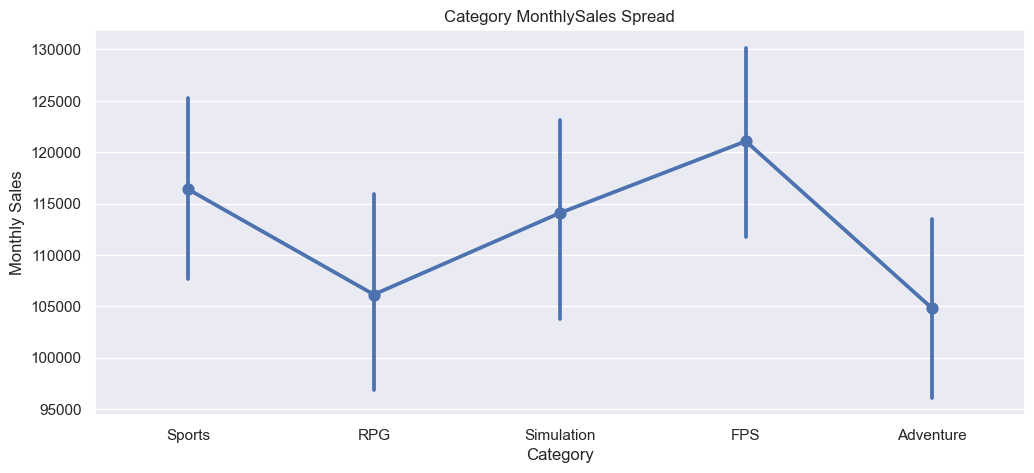

In [19]:
# visualise spread for Category
sns.pointplot(data=df_sales, x='Category', y='Monthly Sales').set_title('Category MonthlySales Spread');

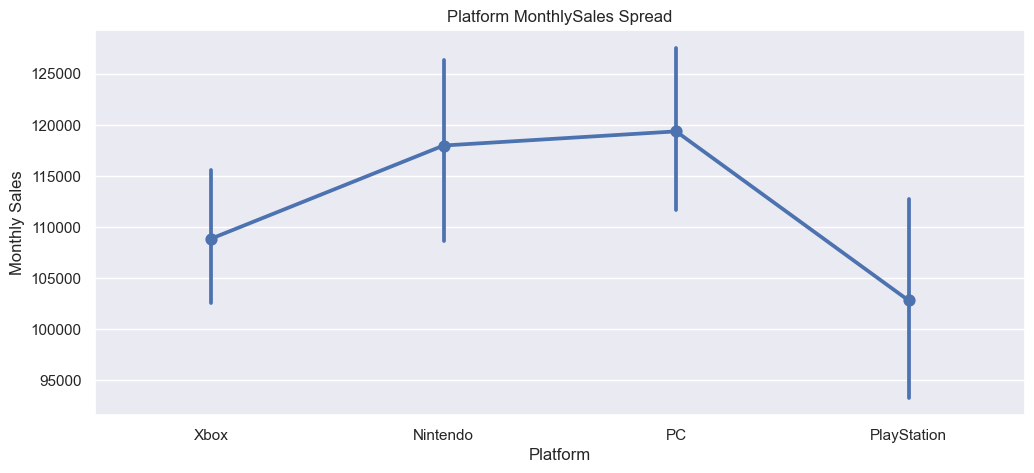

In [20]:
# visualise Monthly Sales spread for platform
sns.pointplot(data=df_sales, x='Platform', y='Monthly Sales').set_title('Platform MonthlySales Spread');

In [21]:
# create new column in dataset
df_sales['Category-Platform'] = df_sales['Category'] + ' -- ' + df_sales['Platform'].str[:4]

In [22]:
df_sales.head()

,Category,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Category-Platform
Month,,,,,,,,
2002-01-01,Sports,108592,2002,1,Xbox,1,0,Sports -- Xbox
2002-02-01,RPG,129387,2002,4,Nintendo,0,0,RPG -- Nint
2002-03-01,Sports,114777,2002,4,PC,0,0,Sports -- PC
2002-04-01,Sports,71738,2002,0,Nintendo,0,0,Sports -- Nint
2002-05-01,Simulation,142512,2002,2,PlayStation,0,0,Simulation -- Play


In [23]:
pair_cat = df_sales.groupby('Category-Platform')[['Monthly Sales']].apply(lambda x: x)
pair_cat.head()

Monthly Sales
Category-Platform Month                    
Adventure -- Nint 2005-06-01         124640
                  2008-12-01          61619
                  2010-04-01         143130
                  2012-02-01          84180
                  2014-11-01          83831

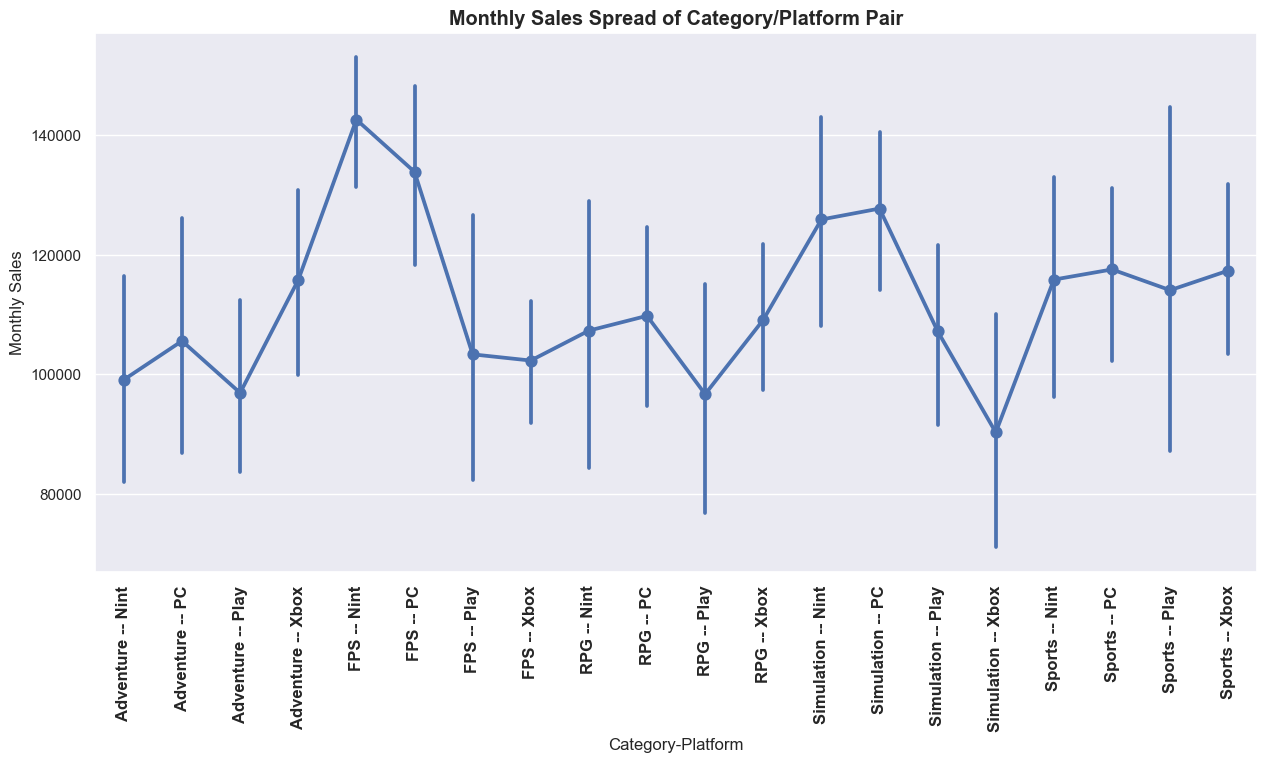

In [24]:
# visualise spread of Monthly Salary with respect to Category/Platform 
plt.figure(figsize=(15,7))
ax = sns.pointplot(data=pair_cat, x='Category-Platform', y='Monthly Sales');
ax.set_title('Monthly Sales Spread of Category/Platform Pair', fontsize='large', fontweight='bold')
plt.xticks(rotation = 90, fontsize='medium', fontweight='bold');
# plt.tick_params(labelsize='small', labelrotation=90)

#### Correlation Between Frequency of Demand and Total Sales for Category/Platform Pairs. 

In [25]:
# create the dataframe for sum and count of each pair
count_sales = df_sales.groupby(['Category-Platform'])[['Monthly Sales']]\
                                .agg(['sum', 'count'])

count_sales.columns = count_sales.columns.droplevel(level=0)

In [26]:
count_sales.head()

,sum,count
Category-Platform,,
Adventure -- Nint,990847,10
Adventure -- PC,1372183,13
Adventure -- Play,1550080,16
Adventure -- Xbox,1852039,16
FPS -- Nint,1425464,10


Total Sum-Purchase Frequency Correlation Coeffiecient =  0.9395311926381725


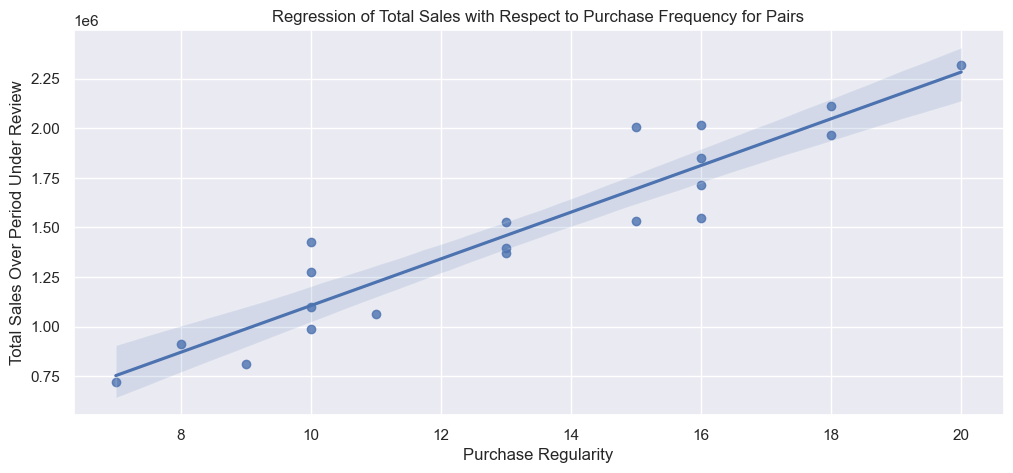

In [27]:
# visualise the regression
ax = sns.regplot(data=count_sales, x='count', y='sum')
ax.set_title('Regression of Total Sales with Respect to Purchase Frequency for Pairs')
plt.xlabel('Purchase Regularity')
plt.ylabel('Total Sales Over Period Under Review')

# calculate correlation coerfficient between count and sum 
x = count_sales['count']
y = count_sales['sum']
res = stats.pearsonr(x, y)
print('Total Sum-Purchase Frequency Correlation Coeffiecient = ', res[0])

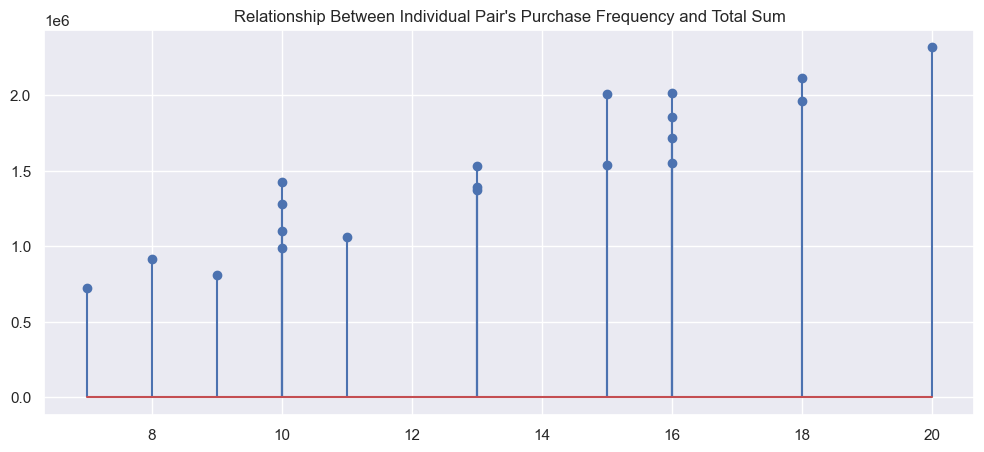

In [28]:
# visualise the the linear relationship between count and sum
plt.stem(x, y)
plt.title("Relationship Between Individual Pair's Purchase Frequency and Total Sum")
plt.show()

In [29]:
cat_platform = df_sales.groupby(['Category', 'Platform'])['Monthly Sales'].apply('sum').reset_index()

In [30]:
cat_platform.head()

,Category,Platform,Monthly Sales
0,Adventure,Nintendo,990847
1,Adventure,PC,1372183
2,Adventure,PlayStation,1550080
3,Adventure,Xbox,1852039
4,FPS,Nintendo,1425464


In [31]:
cat_platform['Monthly Sales'] = cat_platform['Monthly Sales'].divide(cat_platform['Monthly Sales'].sum())
cat_platform.head()

,Category,Platform,Monthly Sales
0,Adventure,Nintendo,0.033407
1,Adventure,PC,0.046264
2,Adventure,PlayStation,0.052261
3,Adventure,Xbox,0.062442
4,FPS,Nintendo,0.048060


In [32]:
# create a pivot table
table = cat_platform.pivot(index='Category', columns=['Platform'], values='Monthly Sales')

In [33]:
table

Platform,Nintendo,PC,PlayStation,Xbox
Category,,,,
Adventure,0.033407,0.046264,0.052261,0.062442
FPS,0.048060,0.067674,0.024384,0.051727
RPG,0.047023,0.037005,0.035850,0.066205
Simulation,0.067892,0.043048,0.057818,0.027391
Sports,0.078091,0.051504,0.030759,0.071195


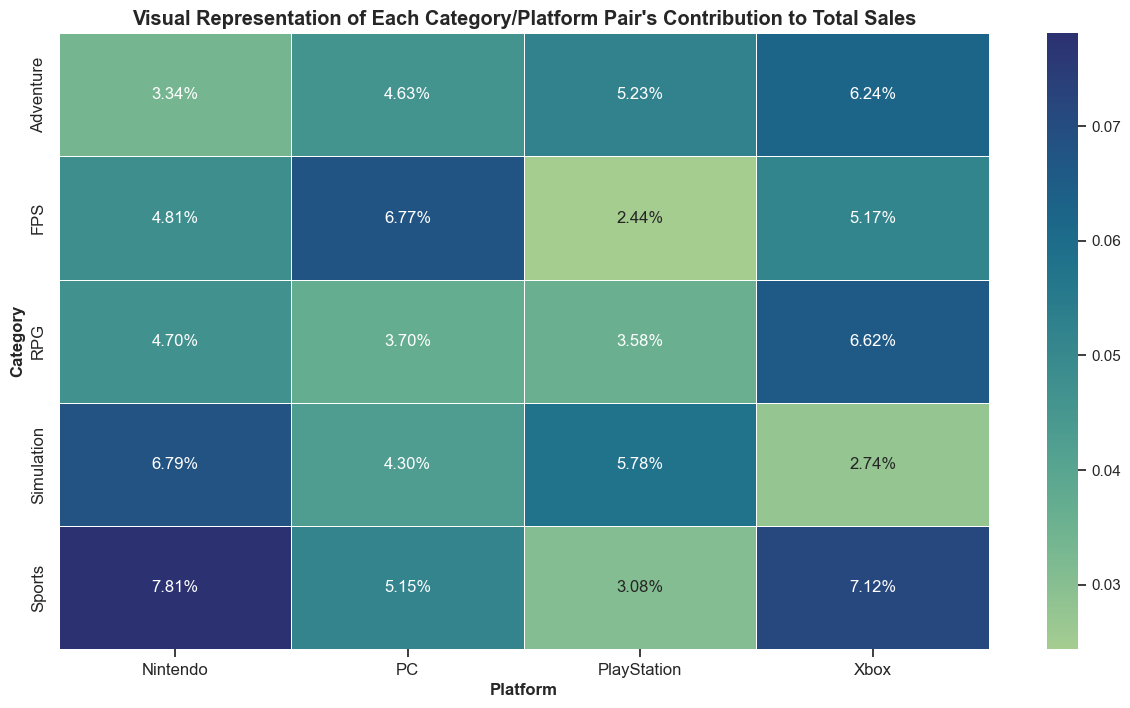

In [34]:
# visualise the table
plt.figure(figsize=(15,8))

ax = sns.heatmap(table, annot=True, cmap='crest', linewidth=.5, fmt='.2%');
ax.set_title("Visual Representation of Each Category/Platform Pair's Contribution to Total Sales", fontsize='large',
            fontweight='bold')
plt.xticks(fontsize='medium', fontweight='medium')
plt.yticks(fontsize='medium', fontweight='medium')
plt.xlabel('Platform', fontsize='medium', fontweight='bold')
plt.ylabel('Category', fontsize='medium', fontweight='bold')
ax.xaxis.tick_bottom()

### Exploring Date Features

In [35]:
# extract more date features from the 'Month' feature
extract_dt = DatetimeFeatures( variables='Month', features_to_extract=['quarter', 'month', 'weekend'])
df_sales_time = extract_dt.fit_transform(sales_data)

In [36]:
df_sales_time.sample(7)

,Category,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Month_quarter,Month_month,Month_weekend
81,RPG,11557,2008,2,Nintendo,0,0,4,10,0
132,FPS,123706,2013,1,PC,1,0,1,1,0
257,Simulation,149754,2023,3,PC,0,1,2,6,0
131,Sports,92079,2012,5,PC,1,0,4,12,1
144,Adventure,112102,2014,2,PlayStation,1,0,1,1,0
157,RPG,122529,2015,6,PlayStation,0,0,1,2,1
136,Sports,101602,2013,2,PlayStation,0,0,2,5,0


In [35]:
grouped = df_sales_time.groupby(['Month_month'])[['Year', 'Monthly Sales']]

### Visualise the Monthly Trend Over the Years

- Although the Time Series does noot exhibit any overt trend, let's visualse it all the same.

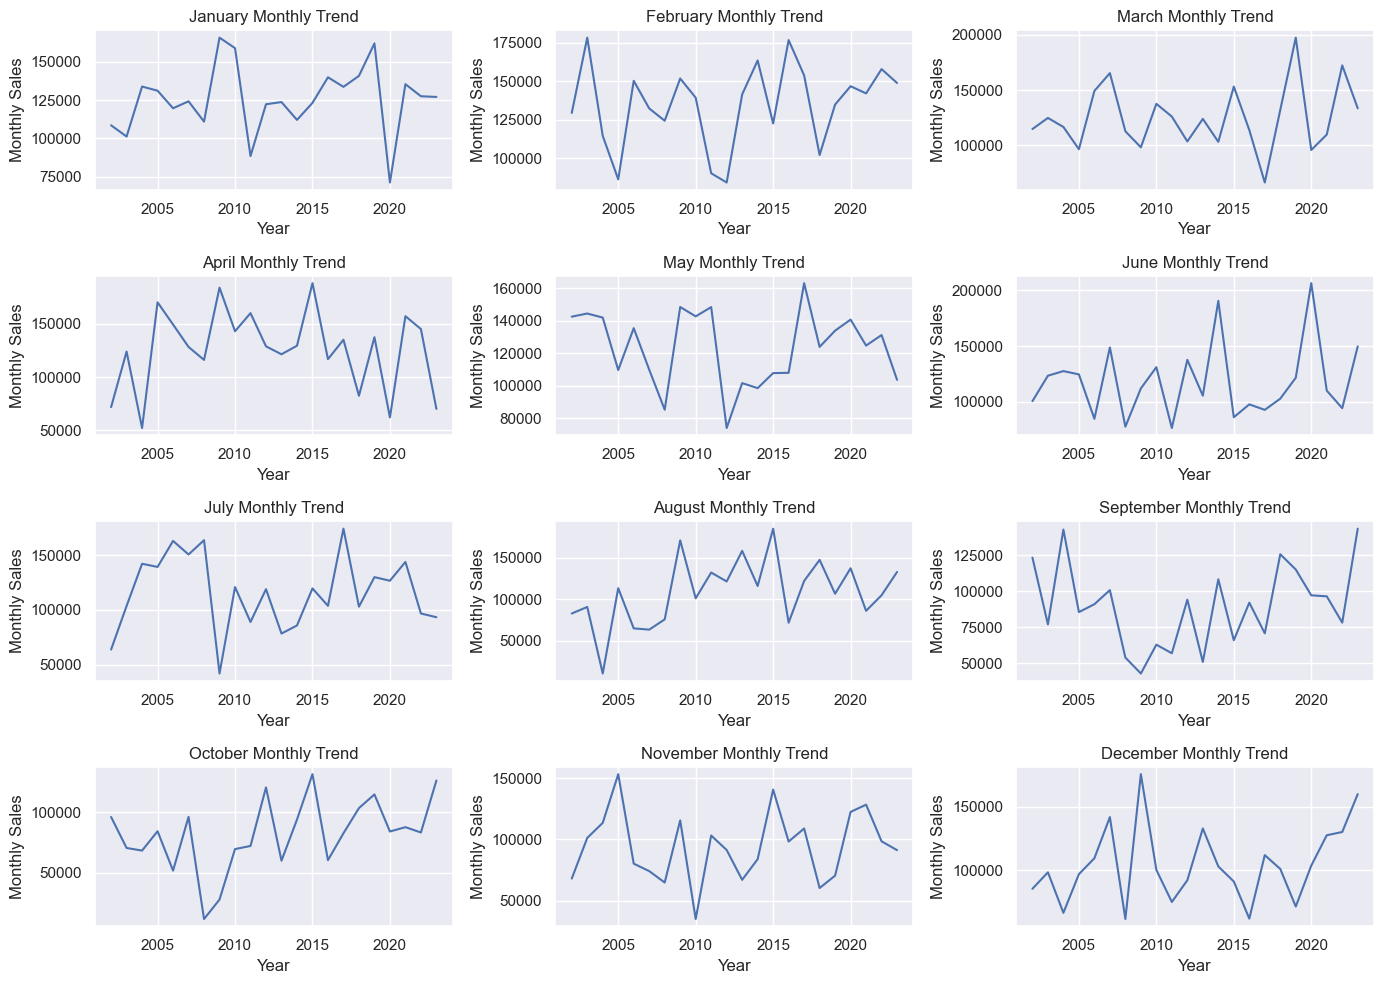

In [36]:
# visualise the the trend for each month across the Time Series
import calendar

fig, axs = plt.subplots(4, 3, figsize=(14, 10))

for ax, m in zip(axs.flatten(), df_sales_time['Month_month'].unique()):
    sns.lineplot(data=grouped.get_group((m,)), x='Year', y='Monthly Sales', ax=ax)
    ax.set_title(f'{calendar.month_name[m]} Monthly Trend')
    ax.set_xlabel('Year')
    ax.set_ylabel('Monthly Sales')
plt.tight_layout()
    


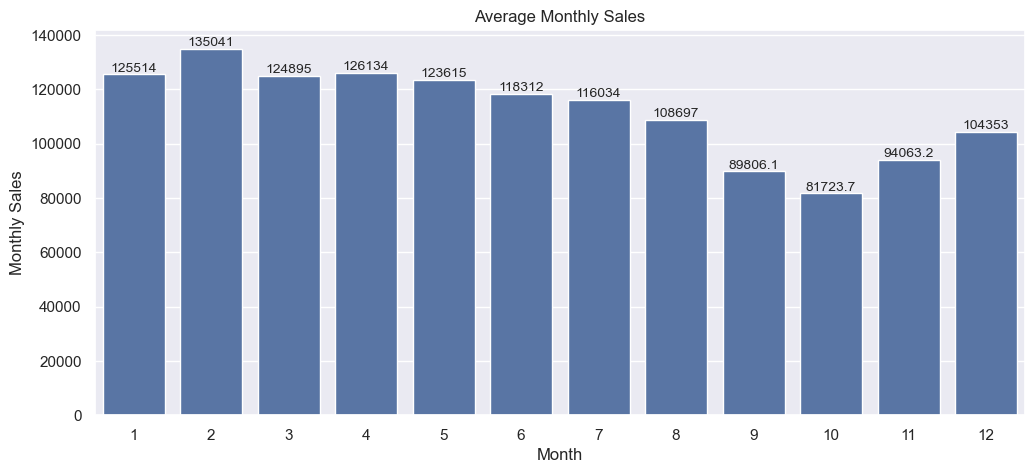

In [37]:
# bar plot of Category
ax = sns.barplot(
    df_sales_time, x='Month_month', y='Monthly Sales', estimator='mean', errorbar=None)
ax.set_title('Average Monthly Sales')
ax.set_xlabel('Month')
ax.bar_label(ax.containers[0], fontsize=10);

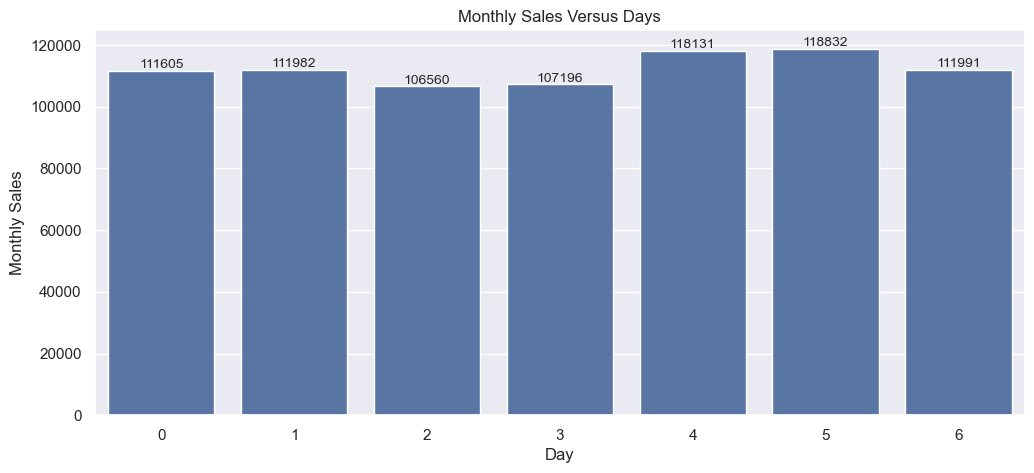

In [38]:
# bar plot of Category, 
ax = sns.barplot(
    df_sales_time, x='DayOfWeek', y='Monthly Sales', estimator='mean', errorbar=None)
ax.set_title('Monthly Sales Versus Days')
ax.set_xlabel('Day')
ax.bar_label(ax.containers[0], fontsize=10);

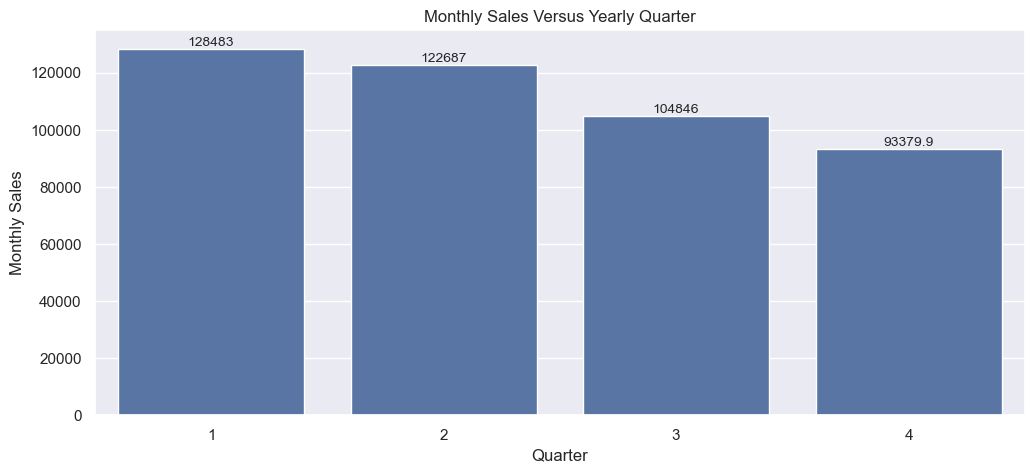

In [39]:
# bar plot of Category
ax = sns.barplot(
    df_sales_time, x='Month_quarter', y='Monthly Sales', estimator='mean', errorbar=None)
ax.set_title('Monthly Sales Versus Yearly Quarter')
ax.set_xlabel('Quarter')
ax.bar_label(ax.containers[0], fontsize=10);

In [73]:
df_sales[df_sales['Holiday'] == 1].index

DatetimeIndex(['2002-01-01', '2002-12-01', '2003-01-01', '2003-12-01',
               '2004-01-01', '2004-12-01', '2005-01-01', '2005-12-01',
               '2006-01-01', '2006-12-01', '2007-01-01', '2007-12-01',
               '2008-01-01', '2008-12-01', '2009-01-01', '2009-12-01',
               '2010-01-01', '2010-12-01', '2011-01-01', '2011-12-01',
               '2012-01-01', '2012-12-01', '2013-01-01', '2013-12-01',
               '2014-01-01', '2014-12-01', '2015-01-01', '2015-12-01',
               '2016-01-01', '2016-12-01', '2017-01-01', '2017-12-01',
               '2018-01-01', '2018-12-01', '2019-01-01', '2019-12-01',
               '2020-01-01', '2020-12-01', '2021-01-01', '2021-12-01',
               '2022-01-01', '2022-12-01', '2023-01-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [74]:
promo = df_sales[df_sales['Promotion'] == 1].index

In [75]:
promo

DatetimeIndex(['2002-07-01', '2003-04-01', '2003-05-01', '2003-10-01',
               '2004-10-01', '2004-11-01', '2005-02-01', '2005-05-01',
               '2006-04-01', '2006-07-01', '2007-07-01', '2008-09-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-11-01', '2010-02-01', '2010-03-01', '2010-05-01',
               '2010-06-01', '2010-07-01', '2011-02-01', '2011-04-01',
               '2011-07-01', '2011-10-01', '2012-01-01', '2012-05-01',
               '2012-07-01', '2012-11-01', '2013-11-01', '2014-02-01',
               '2014-04-01', '2015-07-01', '2015-12-01', '2016-05-01',
               '2016-07-01', '2016-10-01', '2016-12-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2018-09-01', '2019-01-01',
               '2019-02-01', '2019-07-01', '2020-01-01', '2020-02-01',
               '2020-09-01', '2022-04-01', '2022-09-01', '2023-03-01',
               '2023-06-01', '2023-10-01'],
              dtype='datetime64[n

In [76]:
dt_init = df_sales.index[0]
lst = []
for dt in promo:
    mem = (df_sales.loc[(df_sales.index < dt) & (df_sales.index >  dt_init)]['Monthly Sales'].mean(),
    df_sales.loc[(df_sales.index < dt) & (df_sales.index >  dt_init)]['Monthly Sales'].median(),
    df_sales.loc[(df_sales.index < dt) & (df_sales.index >  dt_init)]['Monthly Sales'].max(), 
    df_sales.loc[(df_sales.index < dt) & (df_sales.index >  dt_init)]['Monthly Sales'].min(), 'pr')
    lst.append(mem)
    
    mem = (df_sales.loc[dt]['Monthly Sales'],) * 4
    lst.append(mem)
    
    dt_init = dt


In [77]:
lst[:10]

[(111796.2, 114777.0, 142512, 71738, 'pr'),
 (63758, 63758, 63758, 63758),
 (107490.5, 98727.0, 178291, 67980, 'pr'),
 (124041, 124041, 124041, 124041),
 (nan, nan, nan, nan, 'pr'),
 (144445, 144445, 144445, 144445),
 (98664.75, 97075.5, 123456, 77052, 'pr'),
 (70480, 70480, 70480, 70480),
 (107411.45454545454, 116656.0, 142764, 10469, 'pr'),
 (68321, 68321, 68321, 68321)]

In [78]:
df_sales.loc[(df_sales.index < '2003-04-01') & (df_sales.index > '2002-07-01')]['Monthly Sales']

Month
2002-08-01     82688
2002-09-01    123310
2002-10-01     96191
2002-11-01     67980
2002-12-01     85358
2003-01-01    101263
2003-02-01    178291
2003-03-01    124843
Name: Monthly Sales, dtype: int64

In [79]:
df_promo = pd.DataFrame(lst)
df_promo.columns = ('Mean', 'Median', 'Max', 'Min', 'Period')

In [80]:
df_promo.loc[df_promo['Period'] != 'pr', ['Period']] = 'du'
#df_promo.head()

In [81]:
df_promo.ffill(inplace=True)
df_promo.head()

,Mean,Median,Max,Min,Period
0,111796.2,114777.0,142512.0,71738.0,pr
1,63758.0,63758.0,63758.0,63758.0,du
2,107490.5,98727.0,178291.0,67980.0,pr
3,124041.0,124041.0,124041.0,124041.0,du
4,124041.0,124041.0,124041.0,124041.0,pr


In [82]:
df_promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mean    108 non-null    float64
 1   Median  108 non-null    float64
 2   Max     108 non-null    float64
 3   Min     108 non-null    float64
 4   Period  108 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [83]:
df_promo.head()

,Mean,Median,Max,Min,Period
0,111796.2,114777.0,142512.0,71738.0,pr
1,63758.0,63758.0,63758.0,63758.0,du
2,107490.5,98727.0,178291.0,67980.0,pr
3,124041.0,124041.0,124041.0,124041.0,du
4,124041.0,124041.0,124041.0,124041.0,pr


In [84]:
df_promo['Period'].unique()

array(['pr', 'du'], dtype=object)

In [ ]:
sns.lineplot(data_promo, x='Year', y='Monthly Sales', ax=ax)

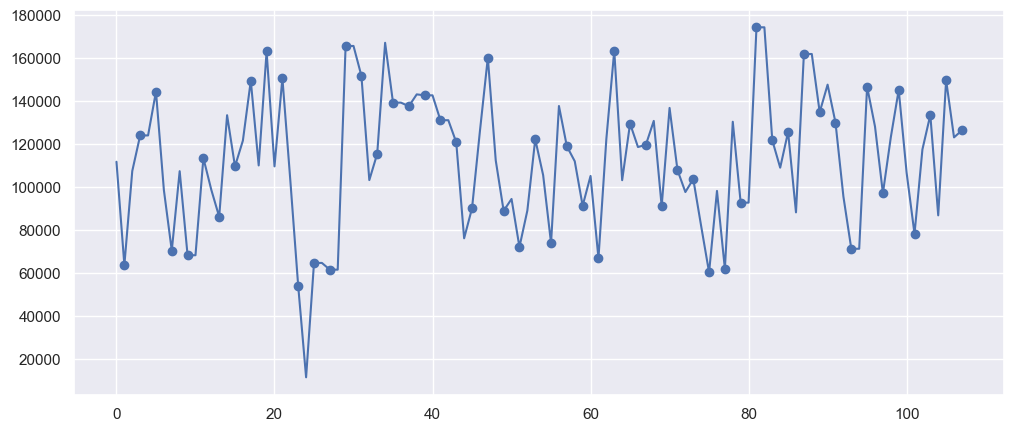

In [92]:
plt.plot(df_promo.iloc[:,:1])
plt.scatter(df_promo[df_promo['Period']=='du'].index, df_promo.loc[df_promo['Period']=='du', 'Mean'])
for d in df_promo['Period']:
    df_promo['Mean'] < 